***Problem Statement:***In the mushroom data set,there exists multicollinearity among the features.

Now,using Ridge Regression,I will try to overcome the existat multi-collinearity.

#***Loading Important Libraries***

In [589]:
import numpy as np # for linear algebric operations
import pandas as pd #To craet data frame for easy to use the data set.
import matplotlib.pyplot as plt # for data visualisation
import seaborn as sns # for visualisation of advanced statistical realtionships 

# **Unzipping the Dataset**

In [590]:

import zipfile as z
zip_ref = z.ZipFile("/content/train.csv.zip", "r") #the source path is given. 'r'<= to read only file
zip_ref.extractall("/content/") #the destination part is given

zip_ref.close() #to close the zip(i.e archive file)

'''
After Using 'with open(path name):'.....not required to close file after processing
'''

"\nAfter Using 'with open(path name):'.....not required to close file after processing\n"



*   **Importance of  '.close()' :** 
*This function will close the zip file
*If we don't use .close() function, the zip fill will still open even after reading it,then :
  * It will consume the memory and the efficiency of the local host will get reduced.
  *   The zip file may be over-written and changes the values of the data points

***So, it is advisable to use .close() function after extract the data***

**Note:** There is another funtion called "with open()",after using "with open()" there is no need to close the file,because,after reading the file,the file wil automatically being closed



# **Importing important libraries**

In [591]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn is a module of python built upon matplotlib to handle statistical data plots
%matplotlib inline


* "%matplot inline" takes care of the plots are being displayed in the same tab without opening new tab
* But, updated version of pyplot takes care of the issue of opening new tab without explicitly mentioning '%matplotlib inline'

In [592]:
df=pd.read_csv("/content/train.csv") 
df #df is te data frame made out of "train.csv"

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0


* Id : Restaurant id. 
* Open Date : opening date for a restaurant.
* City : City that the restaurant is in. Note that there are unicode in the names. 
* City Group: Type of the city. Big cities, or Other. 
* Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile.
* P1, P2 - P37: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
*Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

# **Data Analysis & Data Visualization**

In [593]:
df.shape

(137, 43)

This says that the dataset has 137 rows and 43 columns. Simply meaning, there are 137 data points in the datatset and there are 43 features, one of them is target feature.


In [594]:
df.columns # "df.columns" returns a list of names of fatures(viz. 'Id','Open Date',etc.).

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [595]:

df.isna().sum() 

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64


* 'isna()' returns boolean dtype(i.e. True or False) for each data point,
* 'sum()':go through column-wise and returns how many nan value is present in that specific column.


This says there are no Missing Values. Good for us.

In [596]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

From here we see that **4 of the features are object type** which the model can not understand. So they need to be **encoded**. 

Apart from that, Another observation is that we don't need to use the feature 'ID' as it's anyway **not going to give me any insight of the revenue**. So we will simply drop it.

In [597]:
df.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [598]:
#The ID column is irrelevant so we will drop them.
df=df.drop('Id',axis=1) #'axis=1' =>selecting the whole column while traversing through all rows
df

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0


Now I am going to convert the 'Open Date' feature in **datetime format** so that I can extract the month and year from it. I want to do this because the date doesn't give me any insight of the revenue. But the **month and year surely does.**

In [599]:
df['Open Date'] = pd.to_datetime(df['Open Date'])
df

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0


Here I am extracting the **month** from the feature **'Open Date'**.

In [600]:
df['month']=[x.month for x in df['Open Date']]

Here I am extracting the **year** from the feature **'Open Date'**.

In [601]:
df['year']=[x.year for x in df['Open Date']]

In [602]:
df.columns

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue', 'month', 'year'],
      dtype='object')

In [603]:
df.columns

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue', 'month', 'year'],
      dtype='object')

* Look,there are two features added named **'month '** and **'year'** besides existing features.
* Now we will **drop 'Open Date'** as well as we have extracted all the information from it and now its of no use to me.

In [604]:
df=df.drop(['Open Date'],axis=1) # 'drop()' function dprops the feature mentioned in argument from data set
df

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,year
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7,1999
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2,2008
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,3,2013
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2,2012
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,6,2008
133,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,10,2006
134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,7,2006
135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,10,2010


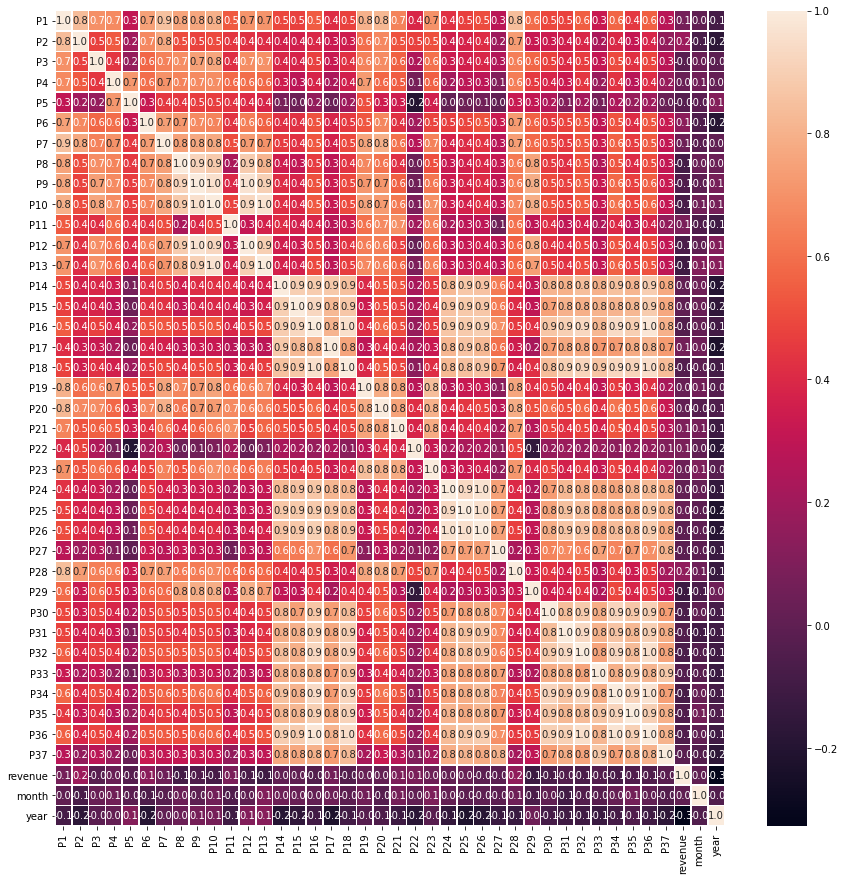

In [605]:
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(15,15)) #Add a subplot to the current figure.
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

As,clear from the heat map,there is an existance of multi collinearity between many features ,mainly, among p_i(i goes from 1 to 37) features

***We have to deal with multi colinearity***

**To know which features have multi-collinearity**

In [606]:
def corr(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        col_name=corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr

In [607]:
corr_features=corr(df,threshold=0.9)

In [608]:
l=list(corr_features)
l

['P18',
 'P31',
 'P25',
 'P13',
 'P26',
 'P36',
 'P35',
 'P10',
 'P32',
 'P9',
 'P12',
 'P34',
 'P16']

There are 13 features those are highly correlated,so we can drop it

Now let's try to **visualize the trends** in month and year to understand how they affect the revenue.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


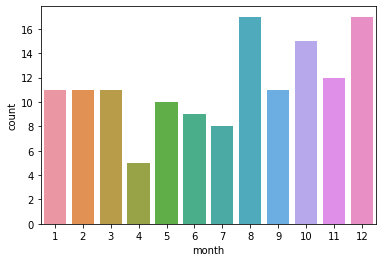

In [609]:
sns.countplot(df['month'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


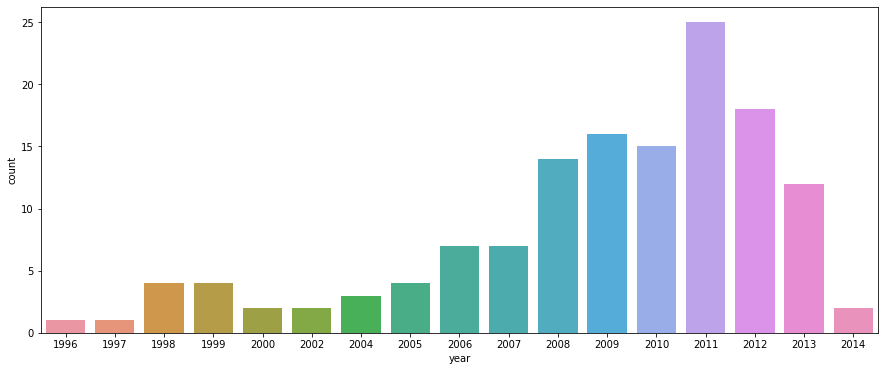

In [610]:
plt.figure(figsize=(15,6))
sns.countplot(df['year'])

From the above plot we can look at the occurence of various months(viz. 1st month couurs 11 times in th data set...) in the dataset. We have the most data for the last 5 months. The highest of them is from **August** and **December**. Now let's see in which month did we have the most revenue. For this I will try to find the **mean of the revenue** for each month.

In [611]:
df.groupby('month')['revenue'].mean()


month
1     5.900851e+06
2     4.189109e+06
3     3.969557e+06
4     4.726097e+06
5     3.657800e+06
6     3.776214e+06
7     3.458596e+06
8     3.883020e+06
9     5.390856e+06
10    5.236838e+06
11    4.721400e+06
12    4.299763e+06
Name: revenue, dtype: float64

From here we can see that the month **January gave the most revenue** to the restraunts. **September** and **October** followed January. Let's try to plot a bargraph with the same and visualize the same trends.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


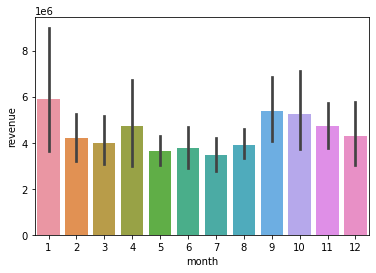

In [612]:
sns.barplot('month','revenue',data=df)

95% occurance probability is being lied within this vertical line magnitude

So these bargraphs are giving out the same information. Now lets try to do same kind of stuffs for the newly generated feature **'year'**.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


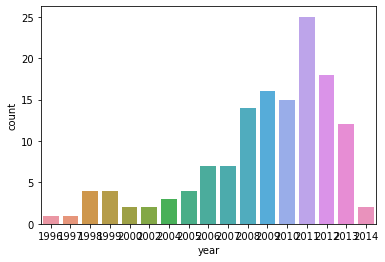

In [613]:
plt.figure
sns.countplot(df['year'])

Here we are having a bit of trouble in visualization because the labels in the x-axis are not clear. Let's try to zoom in a bit!!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


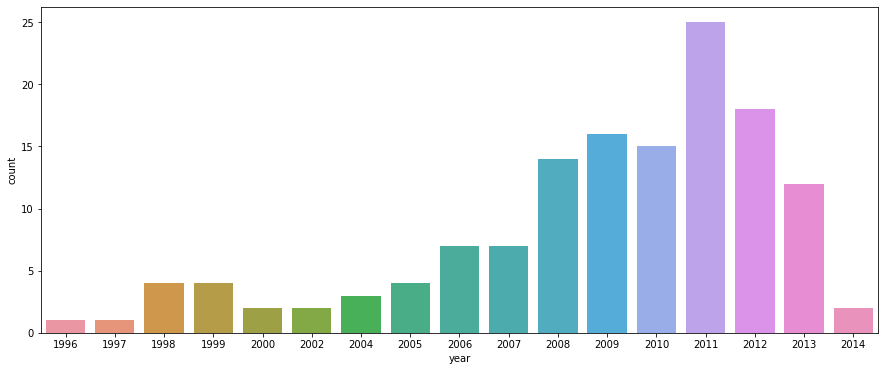

In [614]:
plt.figure(figsize=(15,6))
sns.countplot(df['year'])

From here we can see that the most of the data is from the years **2008-2013**. Out of them the most of the data is from the year 2011. The other years are contruibuting really less on the basis of number of data. This is also going to affect the results as well.


In [615]:
df.groupby('year')['revenue'].mean()


year
1996    3.903884e+06
1997    4.286645e+06
1998    4.251905e+06
1999    7.329030e+06
2000    1.359602e+07
2002    4.991022e+06
2004    3.482435e+06
2005    6.611118e+06
2006    4.203972e+06
2007    5.079333e+06
2008    4.876962e+06
2009    4.652457e+06
2010    4.383878e+06
2011    4.147879e+06
2012    3.837859e+06
2013    2.532287e+06
2014    2.464944e+06
Name: revenue, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


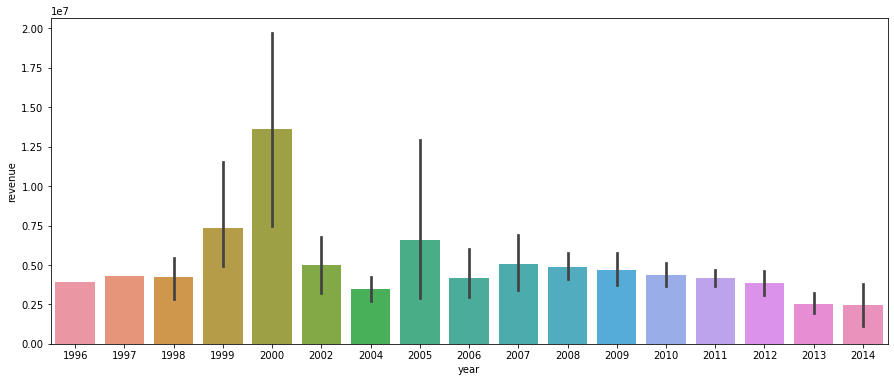

In [616]:
plt.figure(figsize=(15,6))
sns.barplot('year','revenue',data=df)

Out of all the years, the highest revenue was generated in the year **2000** and after that **1999** and **2005**.

# **Data Preprocessing.**

In [617]:
df['Type'].value_counts()


FC    76
IL    60
DT     1
Name: Type, dtype: int64

There are 3 distinct values in the feature **'Type'**. We can encode the values as this:

**FC as 0;**


**IL as 1;**

**DT as 2;**

The order or the numbers can be anything.

In [618]:
ty={'FC':0,'IL':1,'DT':2}
df['Type'] = df['Type'].map(ty)


In [619]:
df

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,year
0,İstanbul,Big Cities,1,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7,1999
1,Ankara,Big Cities,0,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2,2008
2,Diyarbakır,Other,1,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,3,2013
3,Tokat,Other,1,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2,2012
4,Gaziantep,Other,1,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,Other,0,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,6,2008
133,İzmir,Big Cities,0,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,10,2006
134,Kayseri,Other,0,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,7,2006
135,İstanbul,Big Cities,0,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,10,2010


In [620]:
df['City Group'].value_counts()


Big Cities    78
Other         59
Name: City Group, dtype: int64

In [621]:
cg={'Big Cities':0,'Other':1}
df['City Group'] = df['City Group'].map(cg)


In [622]:
df

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,year
0,İstanbul,0,1,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7,1999
1,Ankara,0,0,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2,2008
2,Diyarbakır,1,1,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,3,2013
3,Tokat,1,1,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2,2012
4,Gaziantep,1,1,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,1,0,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,6,2008
133,İzmir,0,0,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,10,2006
134,Kayseri,1,0,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,7,2006
135,İstanbul,0,0,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,10,2010


In [623]:
a=df['City'].value_counts()
a

İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Kayseri            3
Tekirdağ           3
Adana              3
Diyarbakır         3
Eskişehir          3
Aydın              2
Muğla              2
Trabzon            2
Konya              2
Gaziantep          1
Osmaniye           1
Isparta            1
Kastamonu          1
Elazığ             1
Uşak               1
Edirne             1
Bolu               1
Amasya             1
Denizli            1
Kocaeli            1
Balıkesir          1
Tokat              1
Şanlıurfa          1
Kırklareli         1
Karabük            1
Afyonkarahisar     1
Kütahya            1
Name: City, dtype: int64

Here manually creating the dictionary is inefficient. So we will store the city names in a list and then use the element as the **key** of the dictionary and the index of each element as its **key values**. 

In [624]:
b=a.index # city names are the index of the a
b

Index(['İstanbul', 'Ankara', 'İzmir', 'Bursa', 'Samsun', 'Sakarya', 'Antalya',
       'Kayseri', 'Tekirdağ', 'Adana', 'Diyarbakır', 'Eskişehir', 'Aydın',
       'Muğla', 'Trabzon', 'Konya', 'Gaziantep', 'Osmaniye', 'Isparta',
       'Kastamonu', 'Elazığ', 'Uşak', 'Edirne', 'Bolu', 'Amasya', 'Denizli',
       'Kocaeli', 'Balıkesir', 'Tokat', 'Şanlıurfa', 'Kırklareli', 'Karabük',
       'Afyonkarahisar', 'Kütahya'],
      dtype='object')

In [625]:
c={}
for i,j in enumerate(b):
  c.update({j:i})
  print(c)


{'İstanbul': 0}
{'İstanbul': 0, 'Ankara': 1}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3, 'Samsun': 4}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3, 'Samsun': 4, 'Sakarya': 5}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3, 'Samsun': 4, 'Sakarya': 5, 'Antalya': 6}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3, 'Samsun': 4, 'Sakarya': 5, 'Antalya': 6, 'Kayseri': 7}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3, 'Samsun': 4, 'Sakarya': 5, 'Antalya': 6, 'Kayseri': 7, 'Tekirdağ': 8}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3, 'Samsun': 4, 'Sakarya': 5, 'Antalya': 6, 'Kayseri': 7, 'Tekirdağ': 8, 'Adana': 9}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3, 'Samsun': 4, 'Sakarya': 5, 'Antalya': 6, 'Kayseri': 7, 'Tekirdağ': 8, 'Adana': 9, 'Diyarbakır': 10}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3, 'Samsun': 4, 'Sakarya': 5, 'Antalya': 6, 'Kayseri

In [626]:
c

{'Adana': 9,
 'Afyonkarahisar': 32,
 'Amasya': 24,
 'Ankara': 1,
 'Antalya': 6,
 'Aydın': 12,
 'Balıkesir': 27,
 'Bolu': 23,
 'Bursa': 3,
 'Denizli': 25,
 'Diyarbakır': 10,
 'Edirne': 22,
 'Elazığ': 20,
 'Eskişehir': 11,
 'Gaziantep': 16,
 'Isparta': 18,
 'Karabük': 31,
 'Kastamonu': 19,
 'Kayseri': 7,
 'Kocaeli': 26,
 'Konya': 15,
 'Kütahya': 33,
 'Kırklareli': 30,
 'Muğla': 13,
 'Osmaniye': 17,
 'Sakarya': 5,
 'Samsun': 4,
 'Tekirdağ': 8,
 'Tokat': 28,
 'Trabzon': 14,
 'Uşak': 21,
 'İstanbul': 0,
 'İzmir': 2,
 'Şanlıurfa': 29}

In [627]:
df['City'] = df['City'].map(c)
df

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,year
0,0,0,1,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7,1999
1,1,0,0,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2,2008
2,10,1,1,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,3,2013
3,28,1,1,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2,2012
4,16,1,1,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,14,1,0,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,6,2008
133,2,0,0,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,10,2006
134,7,1,0,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,7,2006
135,0,0,0,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,10,2010


In [628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        137 non-null    int64  
 1   City Group  137 non-null    int64  
 2   Type        137 non-null    int64  
 3   P1          137 non-null    int64  
 4   P2          137 non-null    float64
 5   P3          137 non-null    float64
 6   P4          137 non-null    float64
 7   P5          137 non-null    int64  
 8   P6          137 non-null    int64  
 9   P7          137 non-null    int64  
 10  P8          137 non-null    int64  
 11  P9          137 non-null    int64  
 12  P10         137 non-null    int64  
 13  P11         137 non-null    int64  
 14  P12         137 non-null    int64  
 15  P13         137 non-null    float64
 16  P14         137 non-null    int64  
 17  P15         137 non-null    int64  
 18  P16         137 non-null    int64  
 19  P17         137 non-null    i

Now everything looks just fine. So we can go ahead with the data and start model building.

# ***WITH TAKING COLLINEARED FEATURES***

The first task will be to **split the dataset** into train set and test set.

In [629]:
from sklearn.model_selection import train_test_split
x=df.drop('revenue',axis=1)
y=df['revenue']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30)


Let's check the dimension of train and test set.

In [630]:
X_train.shape

(95, 42)

In [631]:
y_train.shape

(95,)

In [632]:
X_test.shape

(42, 42)

In [633]:
y_test.shape

(42,)

Before moving ahead, I am importing all the models from sklearn

In [634]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

## Linear Regression

In [635]:
'''
lr = LinearRegression() #create the object of the model
lr=lr.fit(X_train,y_train)
'''




'\nlr = LinearRegression() #create the object of the model\nlr=lr.fit(X_train,y_train)\n'

In [636]:
 #create the object of the model
lr=LinearRegression().fit(X_train,y_train)

In [637]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [638]:
X_test.shape

(42, 42)

In [639]:
pred = lr.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the linear regressor is: "+str(s))
print("The MsE with the linear regressor is: "+str(s1))
print("The R2_Score with the linear regressor is: "+str(s2))

The MAE with the linear regressor is: 2498286.3837149017
The MsE with the linear regressor is: 11462276115125.28
The R2_Score with the linear regressor is: -2.4113295417981107


In [640]:
len(lr.coef_)

42

In [641]:
weight_lr=pd.DataFrame(lr.coef_,index=X_test.columns,columns=['weight_coefficient'])
weight_lr

,weight_coefficient
City,-2.074147e+04
City Group,-6.158846e+05
Type,-1.290419e+06
P1,2.918061e+05
P2,-7.390225e+04
P3,-4.522112e+05
P4,5.179220e+04
P5,-2.959782e+05
P6,1.358481e+05
P7,1.709102e+05


## ***Ridge Regression***

Before I discuss Ridge Regression , let's discuss some of the aspects of the Ridge Regression:



 One of the algorithm to deal with this multi-collinearity is **Ridge Regression.**

Let's discuss some of the points in Ridge Regression.



1.   Ridge Regression is a Regularisation Technique.'Regularisation' means by using some hyper-parameter,the value of the parameters can be regularised.That has been accomplished in the following way:


*   Instead of using mere a cost function like this:
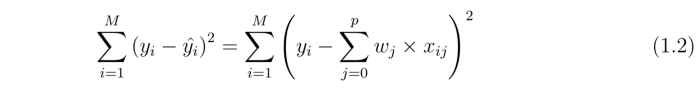
*   We will use this:
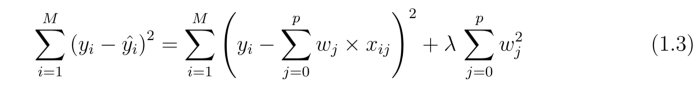

Where, $\lambda >0$ is a hyper-parameter.


2.   As,the cost function tends to decrease during training, $w_i$ s will be updated such a way ,some of the $w_i$ will be updated  $\to$ 0.

As, $w_i$'s  $\to$ 0,the collineared features get less pripority and that overfitting ambiguity due to multi-collinearity can be avoided.



In [642]:
from sklearn.linear_model import Ridge

In [643]:
rr=Ridge(alpha=0.8)

fit_r=rr.fit(X_train,y_train)

pred_r = rr.predict(X_test)
s_r=mean_absolute_error(y_test,pred_r)
s1_r=mean_squared_error(y_test,pred_r)
s2_r=r2_score(y_test,pred_r)

print("The MAE with the Ridge linear regressor is: "+str(s_r))
print("The MsE with the Ridge linear regressor is: "+str(s1_r))
print("The R2_Score with Ridge linear regressor is: "+str(s2_r))

The MAE with the Ridge linear regressor is: 2354458.1154690315
The MsE with the Ridge linear regressor is: 9994439819900.09
The R2_Score with Ridge linear regressor is: -1.97448146152741


In [644]:
weight_rr=pd.DataFrame(rr.coef_,index=X_test.columns,columns=['weight_coefficient'])
weight_rr

,weight_coefficient
City,-2.088469e+04
City Group,-5.389436e+05
Type,-1.156941e+06
P1,2.749351e+05
P2,-9.376050e+04
P3,-3.957577e+05
P4,5.098787e+04
P5,-2.640218e+05
P6,1.619385e+05
P7,1.814993e+05


In [645]:
len(rr.coef_)

42

# ***Conclusion***

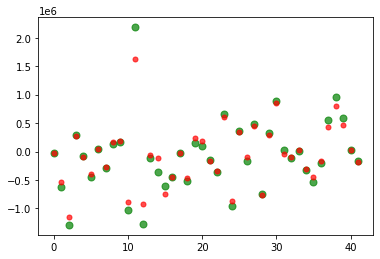

In [654]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='red',label=r'Ridge',zorder=7) 
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

In [655]:
#Comparison:

print("The R2_Score with Ridge linear regressor is: "+str(s2_r))
print("The R2_Score with the linear regressor is: "+str(s2))

The R2_Score with Ridge linear regressor is: -1.97448146152741
The R2_Score with the linear regressor is: -2.4113295417981107


The sole purpose of this project is to implement **Ridge**  regression.As,it is evident from the above  discussion, $Ridge$ is superior in case of multi-collinearity case and throw a merginally,good R2 score as compared to other one.

Future Motivation:

*   Although,all the weights in this example becomes non-zero in case of Ridge(i.e. the dimenion of the feature space is not reduced.).With the help of $Lesso$ , that can be implemented.

